# BiGram Character level language modelling

In [1]:
words = open('names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
len(words)

32033

#Bigram( one character simply prints a next character with a lookup table of counts)

In [3]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1
        #b.get(bigram) is same as b[bigram] but 0 is used to set default begram to 0


In [4]:
sorted(b.items(),key=lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [5]:
#storing the data in a 2d array
import torch
N = torch.zeros((27,27),dtype=torch.int32)


C:\Users\mahip\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [7]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        x1 = stoi[ch1]
        x2 = stoi[ch2]
        N[x1,x2]+=1

In [8]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

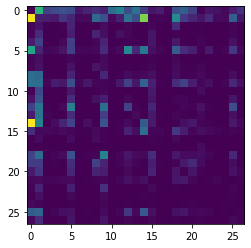

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

# Generating the Frequency Distribution Table for Bigram 

(-0.5, 26.5, 26.5, -0.5)

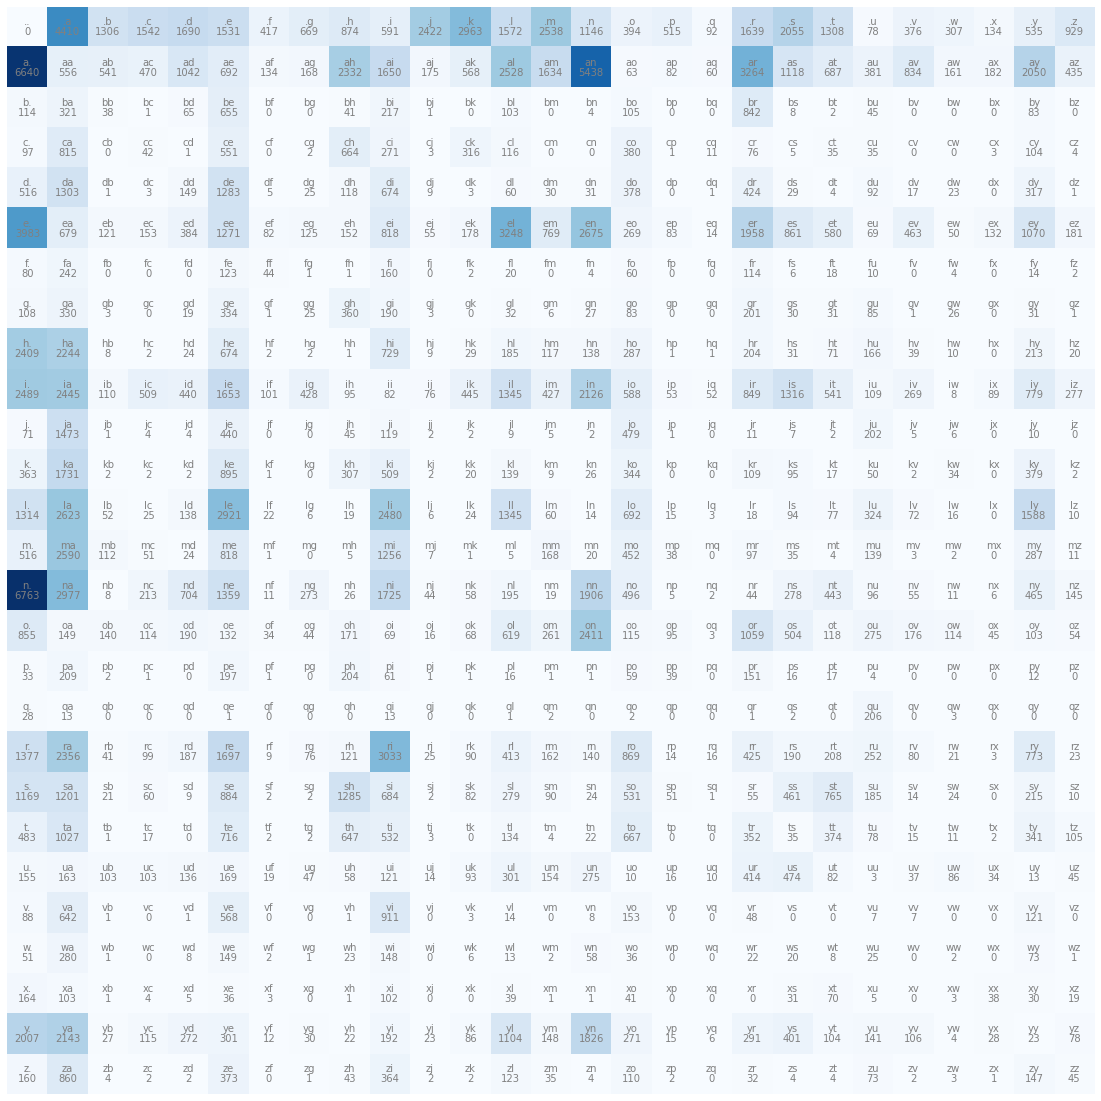

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color='gray')
        plt.text(j,i,N[i,j].item(),ha="center",va="top",color='gray')
plt.axis('off')

In [11]:
# generate a random set of numbers 
# use Generator seed to get same random numbers at all times(Deterministic)
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [12]:
torch.multinomial(p,num_samples=100,replacement=True,generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [13]:
P = N.float()
for i in range (27):
    psum=P[i].sum()
    for j in range(27):
        P[i][j]=P[i][j]/psum
P

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [14]:
P = N.float()
P.sum(1,keepdim=True)


tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

without keepdim the dimension of the matrix is lost {[27]} with keepdim it is {[27,1]}

with keepdim :     27 rows,  27 col || 
                   27 rows,  1 col
                   
this will copy the output vector along all cols
                   thus dividing normalizes the vec along the row
        
without keepdim :  27 rows,  27 col || 
                    1 rows,  27 col
                    
this will copy the output vector along all rows
                   thus dividing normalizes the vec along the cols

Broadcasting Rules : defines whether or not a pair of arrays can perform binary ops like div on tensors
1. Each tensor has atleast 1 dimension
2. When iterating over the dimension sizes, starting at the trailing dimension the dimension sizes must either be equal, one of them is 1 or one of them does not exist

In [15]:
# 1 is added for modal smoothing

P = (N+1).float()
P /= P.sum(1,keepdim=True)
P

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [16]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out=[]
    ix = 0
    while True:
        p = P[ix]    
#         p = N[ix].float()
#         p = p/p.sum()
# without any probability distribution --->  p = torch.ones(27) / 27.0
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [17]:
P[0].sum()

tensor(1.)

# Quality of the Modal

In [18]:
log_likelihood = 0.0
n=0
for w in words[:3]:
# for w in ["joy"]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        x1 = stoi[ch1]
        x2 = stoi[ch2]
        prob = P[x1,x2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2} : {prob:.5f} {logprob:.5f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.e : 0.04779 -3.04104
em : 0.03765 -3.27935
mm : 0.02534 -3.67533
ma : 0.38851 -0.94543
a. : 0.19583 -1.63051
.o : 0.01232 -4.39648
ol : 0.07788 -2.55259
li : 0.17740 -1.72932
iv : 0.01523 -4.18448
vi : 0.35077 -1.04763
ia : 0.13797 -1.98069
a. : 0.19583 -1.63051
.a : 0.13759 -1.98351
av : 0.02462 -3.70409
va : 0.24731 -1.39712
a. : 0.19583 -1.63051
log_likelihood=tensor(-38.8086)
nll=tensor(38.8086)
2.4255354404449463


likelihood is obtained by multiplyinh all the probs of all bigram entries
but it'll turn out to be a small value 
thus we use logarithmic likelihood for lokelihood estimation

we tend to achieve higher log likelihood (closer to 0)
we invert the log likelihood to make is similar to loss fun 
bcz we tend to achieve a lower loss 

nll = negative log likelihood

it is a general practice to use avg nll instead to total sum of log likelihood

We tend to find the parameters that minimises the avg nll(push it close to 0)

# Neural Network for bigarm charcter level model

In [19]:
#creating the training set for bigram(x,y)
xs=[]
ys=[]
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        x1 = stoi[ch1]
        x2 = stoi[ch2]
#         print(ch1,ch2)
        xs.append(x1)
        ys.append(x2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(ys)

tensor([ 5, 13, 13,  1,  0])


a tensor can be cerated using 2 ways :
    1. torch.tensor --- creates a int32 type tensor
    2. torch.Tensor class --- creates a float type tensor
    
we use int32 type bcz oe hot only encodes index inputs (i.e. int inputs)   

we cannot feed a tensor directly to a nn
so we use 1 hot encoding and convert the value to a vector with only desired value as one 

In [20]:
import torch.nn.functional as F
g = torch.Generator().manual_seed(2147483647 + 2)
xenc = F.one_hot(xs,num_classes=27)

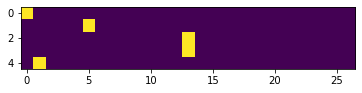

In [21]:
plt.imshow(xenc)

we need float type tensors as we feed float values to a neural network

In [22]:
xenc.dtype

torch.int64

In [23]:
# Casting x encoded to float
xenc = xenc.float()

In [24]:
xenc.dtype

torch.float32

In [25]:
#initializing random wts using standard normal distribution(-3 to 3)
# distributed normally arround 0

#feeding the input to a single neuron
W = torch.randn((27,1),generator = g)

#Multiplying xenc with random wts
# @ is a matrix multiplication operator in py torch
xenc @ W

#  (5,27) @ (27,1) => (5,1)    ... basic matrix multiplication

tensor([[-0.6839],
        [ 0.6324],
        [ 0.4438],
        [ 0.4438],
        [ 0.0283]])

In [26]:
#feeding the input simultaneously to 27 neurons
W = torch.randn((27,27),generator=g)
xenc @ W
#  (5,27) @ (27,27) => (5,27)    ... basic matrix multiplication

tensor([[-1.5462e+00, -1.4104e+00,  2.7538e-01,  1.9507e+00, -1.2905e+00,
          1.0574e+00, -3.3172e-01,  3.2719e-01, -5.2472e-04, -3.4924e-01,
         -7.8737e-01,  1.3339e+00,  1.2336e+00, -9.2912e-01, -2.5668e-01,
          9.9428e-01, -1.1947e+00, -1.5365e+00, -1.2931e+00,  8.3000e-01,
          4.8896e-01, -2.9991e-01,  1.2834e+00, -8.2386e-01, -1.0656e+00,
          1.6010e-01, -9.2743e-02],
        [ 1.4356e-02, -8.0227e-01,  1.6108e+00, -6.1481e-01,  9.5548e-01,
         -9.6272e-01, -3.2109e-01, -1.0515e-01, -7.8300e-01, -2.0771e-01,
          4.8995e-01,  1.2597e+00,  1.3718e+00,  6.2590e-01, -3.9265e-01,
          1.1500e+00, -8.4613e-01, -2.6783e-01,  3.4249e-01,  6.1969e-01,
          2.3505e+00, -3.8187e-01,  9.6924e-01, -3.7740e-01,  3.2931e-02,
         -4.0315e-01,  1.2235e+00],
        [ 4.6489e-01,  5.2268e-01, -4.6673e-01, -2.3613e-01,  1.2714e+00,
         -1.1982e+00, -1.1946e-01, -1.0109e+00, -1.2191e+00,  1.1817e+00,
         -1.1744e+00,  8.5509e-01, -3.19

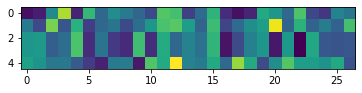

In [27]:
plt.imshow(xenc @ W) 

In [28]:
#softmax layer  -- outputs prob distribution
#               -- take logits as input
#               -- exponentiate them
#               -- normalize them
logits = (xenc @ W) #log counts
counts = logits.exp()
probs = counts / counts.sum(1,keepdim =True)
probs

tensor([[0.0054, 0.0062, 0.0335, 0.1792, 0.0070, 0.0733, 0.0183, 0.0353, 0.0255,
         0.0180, 0.0116, 0.0967, 0.0875, 0.0101, 0.0197, 0.0688, 0.0077, 0.0055,
         0.0070, 0.0584, 0.0415, 0.0189, 0.0919, 0.0112, 0.0088, 0.0299, 0.0232],
        [0.0196, 0.0087, 0.0968, 0.0104, 0.0502, 0.0074, 0.0140, 0.0174, 0.0088,
         0.0157, 0.0315, 0.0681, 0.0762, 0.0361, 0.0130, 0.0610, 0.0083, 0.0148,
         0.0272, 0.0359, 0.2027, 0.0132, 0.0509, 0.0132, 0.0200, 0.0129, 0.0657],
        [0.0518, 0.0549, 0.0204, 0.0257, 0.1161, 0.0098, 0.0289, 0.0118, 0.0096,
         0.1061, 0.0101, 0.0766, 0.0237, 0.0371, 0.0278, 0.0897, 0.0072, 0.0150,
         0.0356, 0.0519, 0.0075, 0.0536, 0.0058, 0.0699, 0.0181, 0.0171, 0.0180],
        [0.0518, 0.0549, 0.0204, 0.0257, 0.1161, 0.0098, 0.0289, 0.0118, 0.0096,
         0.1061, 0.0101, 0.0766, 0.0237, 0.0371, 0.0278, 0.0897, 0.0072, 0.0150,
         0.0356, 0.0519, 0.0075, 0.0536, 0.0058, 0.0699, 0.0181, 0.0171, 0.0180],
        [0.0360, 0.0285,

In [29]:
probs[0].sum()

tensor(1.)

Our Task now is to find the W(s) that gives best prob distribution that produces the ys for given xs

In [30]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print("\n\n-------------------------------------------------------\n")
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('Input to the Neural Network : ',x)
    print('Output probabilities for the neural network : ',probs[i])
    print('Label( Actual next character) : ',y)
    p = probs[i,y]
    print('Probability assigned by the network to the correct character : ',p.item())
    logp = torch.log(p)
    print('Log Likelihood : ',logp)
    nll = -logp
    print('Negative log likelihood : ',nll.item())
    nlls[i] = nll

print('\n\n=============================================================\n')
print('Average nll ,i.e. loss = ',nlls.mean().item())



-------------------------------------------------------

bigram example 1: .e (indexes 0,5)
Input to the Neural Network :  0
Output probabilities for the neural network :  tensor([0.0054, 0.0062, 0.0335, 0.1792, 0.0070, 0.0733, 0.0183, 0.0353, 0.0255,
        0.0180, 0.0116, 0.0967, 0.0875, 0.0101, 0.0197, 0.0688, 0.0077, 0.0055,
        0.0070, 0.0584, 0.0415, 0.0189, 0.0919, 0.0112, 0.0088, 0.0299, 0.0232])
Label( Actual next character) :  5
Probability assigned by the network to the correct character :  0.07332637161016464
Log Likelihood :  tensor(-2.6128)
Negative log likelihood :  2.612834930419922


-------------------------------------------------------

bigram example 2: em (indexes 5,13)
Input to the Neural Network :  5
Output probabilities for the neural network :  tensor([0.0196, 0.0087, 0.0968, 0.0104, 0.0502, 0.0074, 0.0140, 0.0174, 0.0088,
        0.0157, 0.0315, 0.0681, 0.0762, 0.0361, 0.0130, 0.0610, 0.0083, 0.0148,
        0.0272, 0.0359, 0.2027, 0.0132, 0.0509, 0.01

In [31]:
xs

tensor([ 0,  5, 13, 13,  1])

In [32]:
ys

tensor([ 5, 13, 13,  1,  0])

In [33]:
probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0733),
 tensor(0.0361),
 tensor(0.0371),
 tensor(0.0549),
 tensor(0.0360))

In [34]:
#creating the training set for bigram(x,y)
xs=[]
ys=[]
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        x1 = stoi[ch1]
        x2 = stoi[ch2]
#         print(ch1,ch2)
        xs.append(x1)
        ys.append(x2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('Number of exapmles : ',num)


#randomly initialize 27 neurons' weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g,requires_grad = True) 

Number of exapmles :  228146


In [37]:
for k in range(100) :
    #forward Pass
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1,keepdim= True)
    loss = -probs[torch.arange(num),ys].log().mean()
    print(loss.item())
    
    #backward Pass
    W.grad = None #set to zero the gradient
    loss.backward()
    
    #update
    W.data += -50 * W.grad  #learning rate 

2.4726529121398926
2.4724340438842773
2.4722201824188232
2.472010850906372
2.4718058109283447
2.4716053009033203
2.4714088439941406
2.471216917037964
2.4710280895233154
2.470843553543091
2.4706623554229736
2.4704854488372803
2.4703118801116943
2.4701414108276367
2.4699742794036865
2.469810724258423
2.4696500301361084
2.4694924354553223
2.4693379402160645
2.4691860675811768
2.4690370559692383
2.468890905380249
2.468747615814209
2.46860671043396
2.46846866607666
2.468332290649414
2.4681992530822754
2.4680681228637695
2.4679393768310547
2.4678127765655518
2.467688798904419
2.46756649017334
2.4674463272094727
2.4673283100128174
2.4672117233276367
2.467097759246826
2.4669854640960693
2.4668750762939453
2.466766595840454
2.4666595458984375
2.466554641723633
2.466451406478882
2.4663491249084473
2.4662492275238037
2.4661502838134766
2.466053009033203
2.4659574031829834
2.4658634662628174
2.465770721435547
2.465679407119751
2.4655895233154297
2.465500593185425
2.4654135704040527
2.4653275012969

W.grad
it defines the effect of each entry on the loss fun
positive grads defines that say picking W[0,0] and adding small h
to it W[0,0] += h will increase the loss as the grad effect
at W.grad[0,0] is positive

In [38]:
# sample from the Neural Network
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    
    out=[]
    ix = 0
    while True:
#         p = P[ix]    
#         p = N[ix].float()
#         p = p/p.sum()
# without any probability distribution --->  p = torch.ones(27) / 27.0
        xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1,keepdims= True) 
    
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

mor.
axwaninaymoryles.
kondlaisah.
anchshizarie.
odaren.
